Setting design matrix of one dimensional function F equal to it's identity matrix
* Mean square error should be equal to 0 

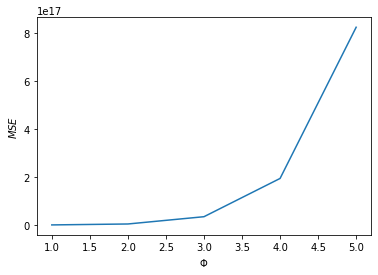

[2.99584954e+14 4.18290857e+15 3.45270039e+16 1.93962519e+17
 8.24046876e+17]


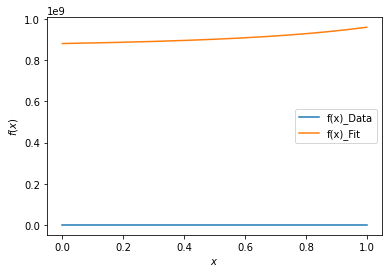

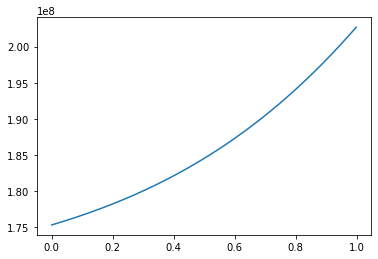

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sklearn.linear_model as skl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

np.random.seed(69420)
#noise = np.random.uniform(0,1,N)

def simple_function(x):
    return(2*x**4+6*x)

def create_X(x,y,n):
    N = len(x)                  # Number of rows in design matrix // corr. to # of inputs to outputs
    l = int((n+1)*(n+2)/2)		# Number of elements in beta // Number of columns in design matrix // corr. to the weights
    X = np.ones((N,l))          # Initialize design matrix X

    # For simple function
    for i in range(1,n+1):   # Looping through columns 1 to n
        X[:,i] = x**(i) 

    # #"Franke"
    # for i in range(1,n+1):  # Loop through i = 1,2,3,4,5
    #     q = int((i)*(i+1)/2) # Desi
    #     for k in range(i+1):
    #         X[:,q+k]=(x**(i-k))*y**k

    return X

n = 5
N = 1000
x = np.sort(np.random.uniform(0,1,N))
#y = np.sort(np.random.uniform(0,1,N))
fx = simple_function(x)

def SVD(A): # Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD)
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=S[i]
    return U @ D @ VT

def ytilde(degree,x,fx):
    X = create_X(x,0,degree)
    beta = SVD(X.T.dot(X)).dot(X.T).dot(fx)
    return X @ beta # Returns ytilde

def MSE_func(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def RelativeError_func(y_data,y_model):
    return abs((y_data-y_model)/y_data)



polyapr = np.zeros((N,n))
MSE = np.zeros(n)
phi = np.arange(1,6)

for degree in range(1,n+1): # skipped 0th complexity kekw
    polyapr[:,degree-1] = ytilde(degree,x,fx)
    MSE[degree-1] = MSE_func(fx,polyapr[:,degree-1])


# Generate a plot showing MSE as a function of complexity
plt.plot(phi,MSE)
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$MSE$')
plt.show()
print(MSE)

# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.plot(x, fx, label=r'f(x)_Data')
ax.plot(x, polyapr[:,4], label=r'f(x)_Fit')
ax.legend()
plt.show()

plt.plot(x,polyapr[:,2])
plt.show()

# Splitting the Data
# X_train, X_test, fx_train, fx_test = train_test_split(X,fx,test_size=0.2)
# reg = LinearRegression().fit(X_train,fx_train)
# reg.score(X,fx)

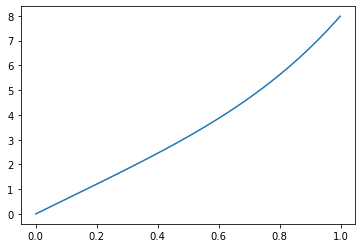

In [69]:
plt.plot(x,fx)